# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [3]:
import pandas as pd

#import Data on well being from csv file
filename = './HSL.csv'
wlb = pd.read_csv(filename)

wlb.head(10)


,LOCATION,Country,TYPE_VAR,Type of indicator,VARIABLE,Indicator,WB,Current/Future Well-being,SEX,Sex,AGE,Age,EDUCATION,Education,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2004,2004,28476.0,NaN,NaN
1,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2005,2005,28730.0,NaN,NaN
2,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2006,2006,29777.0,NaN,NaN
3,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2007,2007,30911.0,NaN,NaN
4,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2008,2008,32475.0,NaN,NaN
5,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2009,2009,32205.0,NaN,NaN
6,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2010,2010,33505.0,NaN,NaN
7,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2011,2011,34050.0,NaN,NaN
8,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2012,2012,33617.0,NaN,NaN
9,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2013,2013,34011.0,NaN,NaN


In [4]:
#remove unnecessary/double information

drop_these = ['LOCATION', 'TYPE_VAR', 'VARIABLE', 'Sex', 'Education', 'Time', 'Flag Codes', 'Flags', 'Age', 'WB']
wlb.drop(drop_these, axis = 1, inplace=True)

#drop missing values

wlb.dropna(axis=0, subset=None, inplace=False)

#create dictionaries that map years (????)
col_dict = {str(i) : f'wlb{i}' for i in range(2004,2022+1)} #same approach but shorter
#wlb.rename(wlb.TIME = col_dict, inplace=True) --> how to replace?

In [5]:
from pandas_datareader import wb

#download Data on GDP and rename

wb_gdp = wb.download(indicator='NY.GDP.PCAP.PP.CD', start=2004, end=2022)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.PP.CD':'GDP per capita, PPP'})


wb_gdp.head(10)


GDP per capita, PPP
country year                     
Canada  2021         52789.675434
        2020         47166.008979
        2019         49783.411866
        2018         49992.762276
        2017         48317.174584
        2016         46472.340249
        2015         44670.080539
        2014         45753.750555
        2013         44298.578734
        2012         42290.965410

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

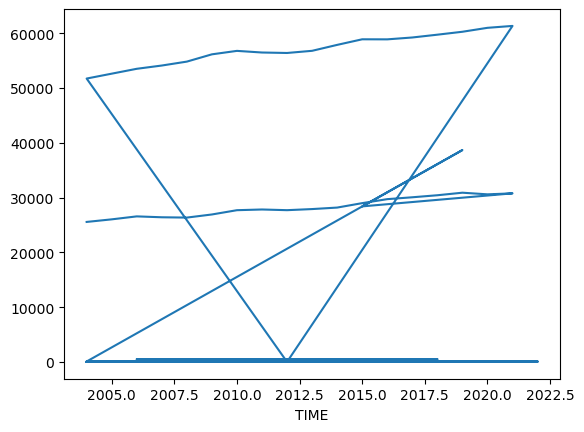

In [9]:
#you can ignore this part im trying some things 

# Data frame with Denmark
wlb_denmark = wlb.loc[wlb['Country'] == 'Denmark', :]
wlb_denmark_av = wlb_denmark.loc[wlb_denmark['Type of indicator'] == 'Average', :]#probaly we could do this in one line but i dont know exactly how



# Plot the content of the data frame
wlb_denmark.plot(x='TIME',y='Value',legend=False);

In [10]:
wlb_denmark_av

,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value
1610,Denmark,Average,Household income,Current Well-being,TOT,TOT,TOT,2004,25553.000000
1611,Denmark,Average,Household income,Current Well-being,TOT,TOT,TOT,2005,26024.000000
1612,Denmark,Average,Household income,Current Well-being,TOT,TOT,TOT,2006,26566.000000
1613,Denmark,Average,Household income,Current Well-being,TOT,TOT,TOT,2007,26403.000000
1614,Denmark,Average,Household income,Current Well-being,TOT,TOT,TOT,2008,26346.000000
...,...,...,...,...,...,...,...,...,...
16543,Denmark,Average,Gender wage gap,Current Well-being,TOT,TOT,TOT,2016,5.732628
16544,Denmark,Average,Gender wage gap,Current Well-being,TOT,TOT,TOT,2017,5.296692
16545,Denmark,Average,Gender wage gap,Current Well-being,TOT,TOT,TOT,2018,4.863206
16546,Denmark,Average,Gender wage gap,Current Well-being,TOT,TOT,TOT,2019,5.059216


**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

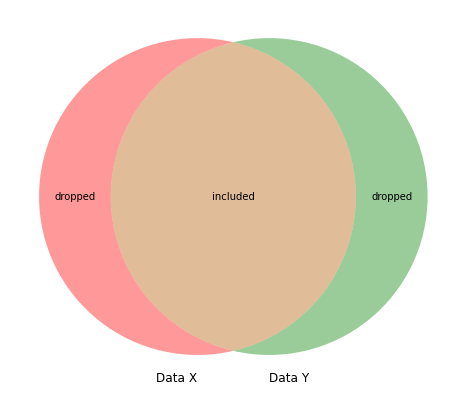

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.